![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39123704-ea58fb38-46f8-11e8-883c-d01f27909c43.jpg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: Marketing Analysis

Your homework for today is to clean, normalize and analyze a dataset gathered from shopping mall customers in the San Francisco Bay area. It's a survey done in 1987, so you might expect many data-entry related errors.

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Hands on! 

The dataset is contained in `data/marketing.csv` along with a file that describes the fields (`data/marketing-description.txt`).

What inconsistencies can you find? What are the fields with more issues? How can you transform the data to be expressed in a better way? What variables are related and at what extent?

All these are the questions that you should be asking and answering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize': (18, 6)})

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">1.</span>
            Load the dataset `data/marketing.csv` as a Pandas dataframe on a variable called `df`.
        </td>
    </tr>
</table>

We don't want you to get stuck with this step. Reading and parsing CSV's with incorrect structure, encoding or separators can be tedious. Only for this step, the solution is provided. Your job is to keep completing the cells that are empty and have the `Your code goes here` comment.

In [3]:
df = pd.read_csv('data/marketing.csv', sep=';')

In [4]:
df.head()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
1,2,1,5.0,4,5,5,3,3,0,Own,1,7,?,76004
2,Male,1,5.0,5,5,5,3,5,2,Own,1,7,1,76004
3,2,1,3.0,5,1,5,2,3,1,Rent,3,7,1,34000
4,2,5,1.0,2,6,5,1,4,2,Live with Parents/Family,1,7,1,9136
5,2,5,1.0,2,6,3,1,4,2,Live with Parents/Family,1,7,1,9136


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">2.</span>
            Check if there is any null value on the dataframe.
        </td>
    </tr>
</table>

> ⚠️ <i>Sometimes null values are represented by special characters, check <b>unique values</b> to find them.</i>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6849 entries, 2 to 8993
Data columns (total 14 columns):
Sex                 6845 non-null object
MaritalStatus       6849 non-null object
Age                 6849 non-null object
Education           6849 non-null object
Occupation          6849 non-null object
YearsInSf           6849 non-null object
DualIncome          6849 non-null int64
HouseholdMembers    6849 non-null object
Under18             6849 non-null int64
HouseholdStatus     6849 non-null object
TypeOfHome          6849 non-null object
EthnicClass         6849 non-null object
Language            6849 non-null object
AnualIncome         6849 non-null object
dtypes: int64(2), object(12)
memory usage: 802.6+ KB


In [6]:
# sums the count of na values in the data frame by column.
df.isnull().sum()

Sex                  3
MaritalStatus        2
Age                  2
Education            1
Occupation          12
YearsInSf            0
DualIncome           0
HouseholdMembers     4
Under18              0
HouseholdStatus      3
TypeOfHome           0
EthnicClass          4
Language             1
AnualIncome          6
dtype: int64

In [18]:
# returns the unique values per column
pd.Series({c: df[c].unique() for c in df})

Age                 [45 thru 54, 25 thru 34, 14 thru 17, 55 thru 6...
AnualIncome         [76004, 34000, 9136, 66994, 32171, 11703, 2167...
DualIncome                                     [No, Yes, Not Married]
Education           [College graduate, Grades 9 to 11, 1 to 3 year...
EthnicClass         [White, Hispanic, Asian, Black, East Indian, O...
HouseholdMembers                          [5, 3, 4, 2, 1, 6, 7, 9, 8]
HouseholdStatus     [Own, Rent, Live with Parents/Family, Rental, ...
Language                                    [English, Other, Spanish]
MaritalStatus       [Married, Single, never married, Divorced or s...
Occupation          [Homemaker, Professional/Managerial, Student, ...
Sex                                                    [Male, Female]
TypeOfHome          [House, Apartment, Other, Condominium, Mobile ...
Under18                                [2, 1, 0, 3, 4, 5, 6, 8, 7, 9]
YearsInSf           [More than ten years, Four to six years, Seven...
dtype: object

In [8]:
df.replace('?', np.nan, inplace = True)

In [15]:
df.replace({
    'Age': {
        '1': '14 thru 17',
        '2': '18 thru 24',
        '3': '25 thru 34',
        '4': '35 thru 44',
        '5': '45 thru 54',
        '6': '55 thru 64',
        '7': '65 and Over'
    },
    'Sex': {
        '2': 'Female',
        '8': np.nan,
        '9': np.nan
    },
    'DualIncome': {
        3: 'No',
        2: 'Yes',
        1: 'Not Married'
    },
    'Education': {
        '1': 'Grade 8 or less',
        '2': 'Grades 9 to 11',
        '3': 'Graduated high school',
        '4': '1 to 3 years of college',
        '5': 'College graduate',
        '6': 'Grad Study'
    },
    'EthnicClass': {
        '1': 'American Indian',
        '2': 'Asian',
        '3': 'Black',
        '4': 'East Indian',
        '5': 'Hispanic',
        '6': 'Pacific Islander',
        '7': 'White',
        '8': 'Other'
    },
    'Language': {
        '1': 'English',
        '2': 'Spanish',
        '3': 'Other'
    },
    'MaritalStatus': {
        '1': 'Married',
        '2': 'Living together, not married',
        '3': 'Divorced or separated',
        '4': 'Widowed',
        '5': 'Single, never married'
    },
    'Occupation': {
        '1': 'Professional/Managerial',
        '2': 'Sales Worker',
        '3': 'Factory Worker/Laborer/Driver',
        '4': 'Clerical/Service Worker',
        '5': 'Homemaker',
        '6': 'Student, HS or College',
        '7': 'Military',
        '8': 'Retired',
        '9': 'Unemployed'
    },
    'TypeOfHome': {
        '1': 'House',
        '2': 'Condominium',
        '3': 'Apartment',
        '4': 'Mobile Home',
        '5': 'Other'
    },
    'YearsInSf':{
        '1': 'Less than one year',
        '2': 'One to three years',
        '3': 'Four to six years',
        '4': 'Seven to ten years',
        '5': 'More than ten years'
    }}, inplace = True)

In [17]:
# drop all rows with any nan objects
df.dropna(how = 'any', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6845 entries, 2 to 8993
Data columns (total 14 columns):
Sex                 6845 non-null object
MaritalStatus       6845 non-null object
Age                 6845 non-null object
Education           6845 non-null object
Occupation          6845 non-null object
YearsInSf           6845 non-null object
DualIncome          6845 non-null object
HouseholdMembers    6845 non-null object
Under18             6845 non-null int64
HouseholdStatus     6845 non-null object
TypeOfHome          6845 non-null object
EthnicClass         6845 non-null object
Language            6845 non-null object
AnualIncome         6845 non-null object
dtypes: int64(1), object(13)
memory usage: 802.1+ KB


In [19]:
df.head()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
2,Male,Married,45 thru 54,College graduate,Homemaker,More than ten years,No,5,2,Own,House,White,English,76004
3,Female,Married,25 thru 34,College graduate,Professional/Managerial,More than ten years,Yes,3,1,Rent,Apartment,White,English,34000
4,Female,"Single, never married",14 thru 17,Grades 9 to 11,"Student, HS or College",More than ten years,Not Married,4,2,Live with Parents/Family,House,White,English,9136
5,Female,"Single, never married",14 thru 17,Grades 9 to 11,"Student, HS or College",Four to six years,Not Married,4,2,Live with Parents/Family,House,White,English,9136
6,Male,Married,55 thru 64,1 to 3 years of college,Retired,More than ten years,No,2,0,Own,House,White,English,66994


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">3.</span>
            Remove the rows that contain invalid values.
        </td>
    </tr>
</table>

In [42]:
df['AnualIncome'] = df['AnualIncome'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6845 entries, 2 to 8993
Data columns (total 14 columns):
Sex                 6845 non-null object
MaritalStatus       6845 non-null object
Age                 6845 non-null object
Education           6845 non-null object
Occupation          6845 non-null object
YearsInSf           6845 non-null object
DualIncome          6845 non-null object
HouseholdMembers    6845 non-null int64
Under18             6845 non-null int64
HouseholdStatus     6845 non-null object
TypeOfHome          6845 non-null object
EthnicClass         6845 non-null object
Language            6845 non-null object
AnualIncome         6845 non-null int64
dtypes: int64(3), object(11)
memory usage: 1.1+ MB


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">4.</span>
            Show <b>basic descriptive statistics</b> (mean, mix, max...) of the data.
        </td>
    </tr>
</table>

In [45]:
df.describe()

,HouseholdMembers,Under18,AnualIncome
count,6845.000000,6845.000000,6.845000e+03
mean,2.863258,0.688240,1.329441e+10
std,1.531188,1.082828,1.099904e+12
min,1.000000,0.000000,7.000000e+00
25%,2.000000,0.000000,1.170300e+04
50%,3.000000,0.000000,3.217100e+04
75%,4.000000,1.000000,6.699400e+04
max,9.000000,9.000000,9.100000e+13


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">5.</span>
            Show a boxplot of `AnualIncome` variable.
        </td>
    </tr>
</table>

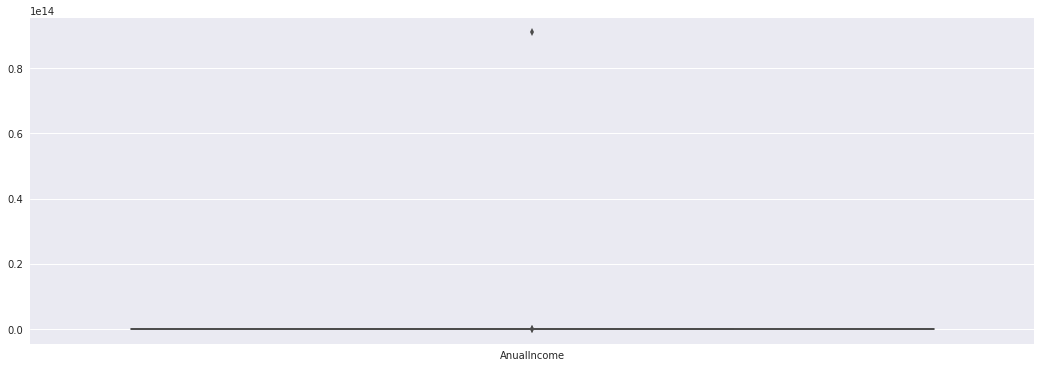

In [51]:
# Your code goes here
sns.boxplot(data = df['AnualIncome'].to_frame())

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">6.</span>
            Identify outlier values on `AnualIncome` and remove them.
        </td>
    </tr>
</table>

In [54]:
# Your code goes here
IQR = df['AnualIncome'].quantile(0.75) - df['AnualIncome'].quantile(0.25)
LB = df['AnualIncome'].quantile(0.25) - (1.5 * IQR)
UB = df['AnualIncome'].quantile(0.75) + (1.5 * IQR)

In [65]:
## mask to removpper bound outlier
mask_UB = df['AnualIncome'] <= UB
mask_LB = df['AnualIncome'] >= LB
df = df[mask_UB & mask_LB]

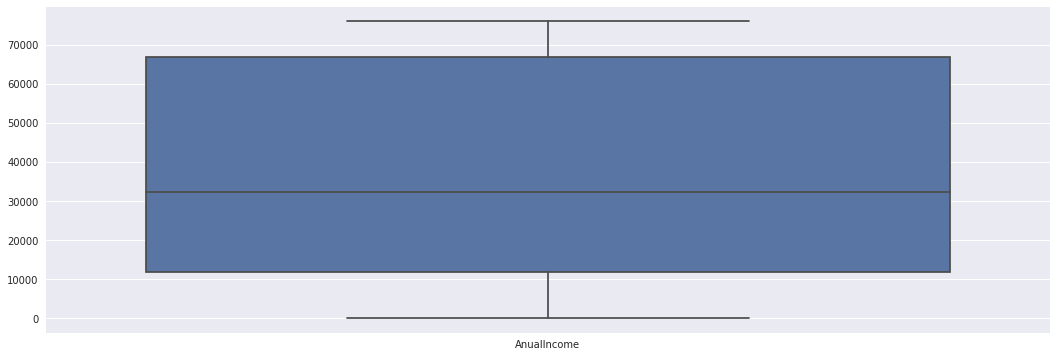

In [67]:
#boxplot with outliers removed
sns.boxplot(data = df['AnualIncome'].to_frame())

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">7.</span>
            Show two different `countplot` for `Sex` and `Education` variables.
        </td>
    </tr>
</table>

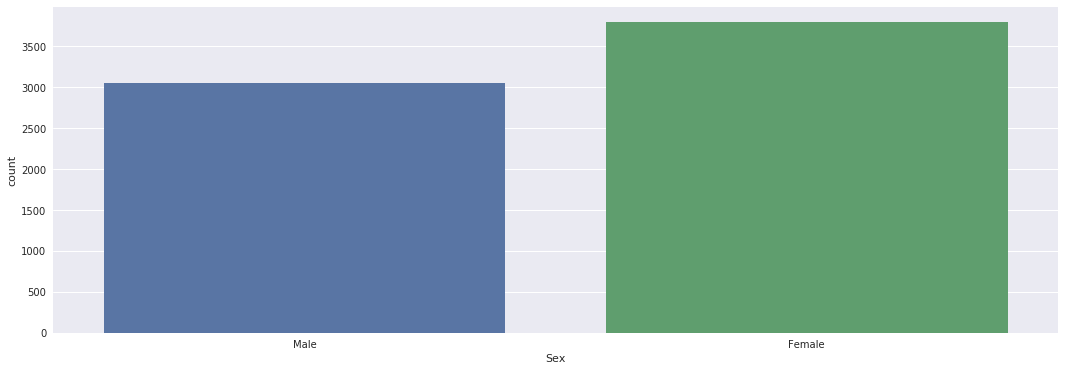

In [73]:
# Your code goes here
sns.countplot(df['Sex'])

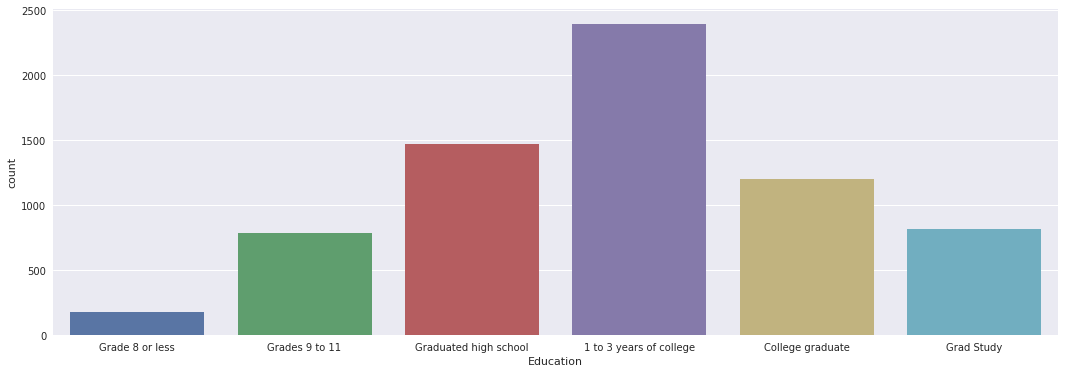

In [76]:
# Your code goes here
sns.countplot(df['Education'], order = ['Grade 8 or less', 'Grades 9 to 11',
                                        'Graduated high school', '1 to 3 years of college',
                                       'College graduate', 'Grad Study'])

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">8.</span>
            Show only `Sex` and `HouseholdStatus` of the first 20 observations.
        </td>
    </tr>
</table>

In [83]:
# Your code goes here
df[['Sex', 'HouseholdStatus']].head(20)

,Sex,HouseholdStatus
2,Male,Own
3,Female,Rent
4,Female,Live with Parents/Family
5,Female,Live with Parents/Family
6,Male,Own
7,Male,Rent
8,Male,Rent
9,Male,Rent
10,Male,Rent
11,Male,Rent


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">9.</span>
            Show only `MaritalStatus` of the observations in position 247.
        </td>
    </tr>
</table>

In [90]:
# Your code goes here
df.iloc[247,:]['MaritalStatus']

'Married'

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">10.</span>
            How many males answered the survey?
        </td>
    </tr>
</table>

In [94]:
# Your code goes here
df[df['Sex'] == 'Male']['Sex'].count()

3049

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">11.</span>
            How many people "Live with Parents/Family"?
        </td>
    </tr>
</table>

> ⚠️ <i>Remember "Live with Parents/Family" is on `HouseholdStatus` column.</i>

In [95]:
# Your code goes here
df[df['HouseholdStatus'] == 'Live with Parents/Family']['HouseholdStatus'].count()

1394

---

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Optional exercises

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">12.</span>
            What is the most common `EthnicClass`?
        </td>
    </tr>
</table>

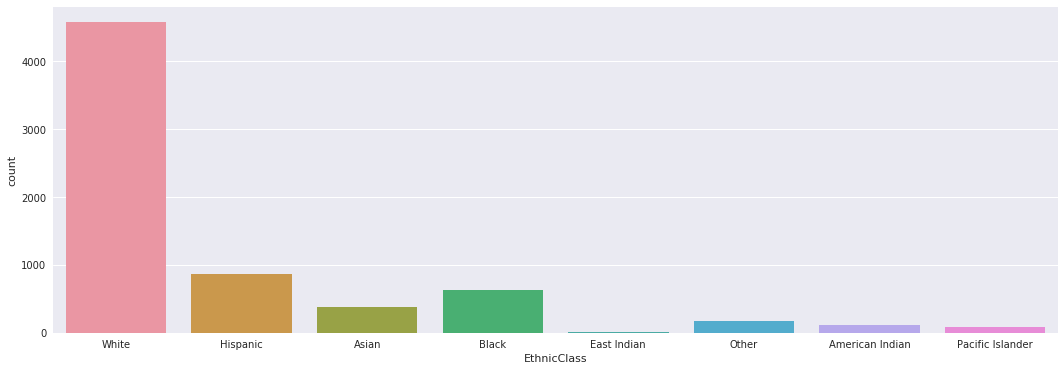

In [98]:
# Your code goes here
sns.countplot(df['EthnicClass'])

## White is the most common ethnic class

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">13.</span>
            Which occupation gets the highest anual income?
        </td>
    </tr>
</table>

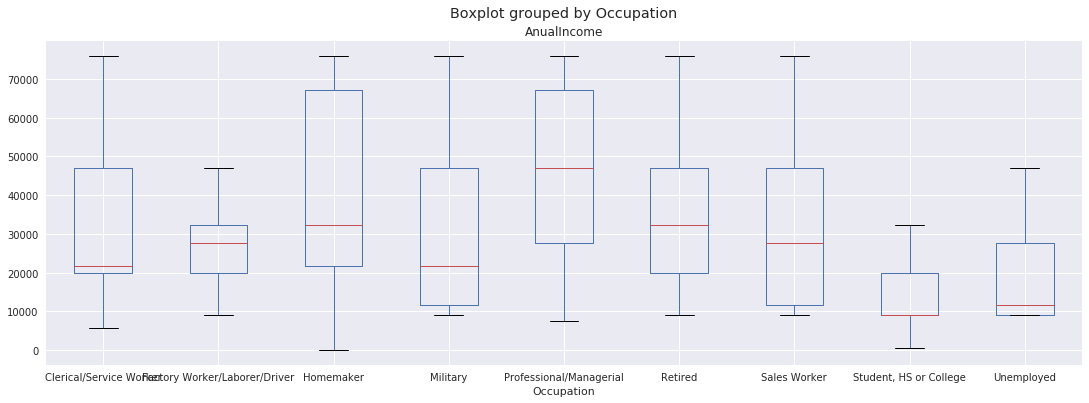

In [99]:
# Your code goes here
df.boxplot(column=['AnualIncome'],by='Occupation')

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)